<a href="https://colab.research.google.com/github/khalishekahmad/teachingMLDL/blob/deep-learning/ML_Week_3_Decision_Tree_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Machine Learning Hands-On: Decision Tree & KNN

## 📌 1. Import Library

In [ ]:
# Import pustaka (library) yang diperlukan
import pandas as pd  # Untuk membaca dan mengolah data
import numpy as np  # Untuk operasi matematika
import matplotlib.pyplot as plt  # Untuk membuat grafik
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi training & testing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Untuk normalisasi dan encoding label
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Algoritma Decision Tree
from sklearn.neighbors import KNeighborsClassifier  # Algoritma K-Nearest Neighbors
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Untuk evaluasi model

# Setting tampilan visualisasi agar lebih bagus
sns.set(style="whitegrid")


## 🌐 2. Mengambil Dataset dari Internet

In [ ]:
# Ambil dataset dari internet
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
print("Dataset berhasil diambil! Ini contoh datanya:")
print(data.head())


Dataset berhasil diambil! Ini contoh datanya:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Penjelasan Output:
Dataset yang diambil merupakan Iris dataset, yang berisi fitur panjang dan lebar sepal serta petal dari bunga iris. Contoh data menunjukkan lima sampel dengan spesies setosa, di mana nilai panjang dan lebar sepal serta petalnya bervariasi.

## 🔍 3. Eksplorasi Data (EDA - Exploratory Data Analysis)

In [ ]:
# Melihat informasi dataset
print("\nInformasi dataset:")
print(data.info())

# Mengecek apakah ada data yang hilang
print("\nCek data yang hilang:")
print(data.isnull().sum())

# Melihat distribusi jumlah masing-masing jenis bunga
print("\nDistribusi kelas target:")
print(data['species'].value_counts())



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Cek data yang hilang:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Distribusi kelas target:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Penjelasan Output:
Dataset Iris ini memiliki 150 entri dengan 5 kolom (4 numerik dan 1 kategori). Tidak ada data yang hilang. Target klasifikasi (species) terbagi rata menjadi tiga kelas: setosa, versicolor, dan virginica, masing-masing sebanyak 50 sampel.

## 📊 4. Visualisasi Data

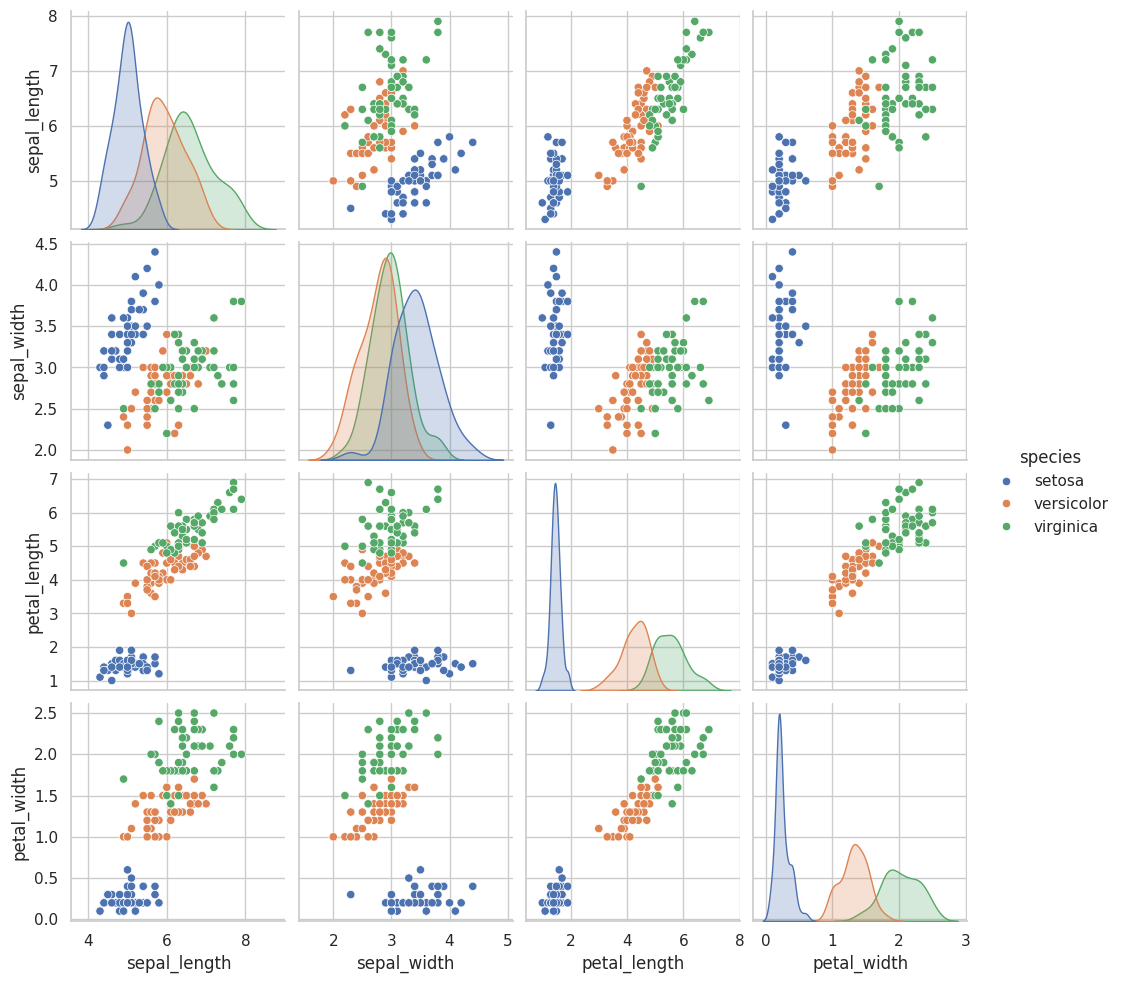

In [ ]:
# Membuat scatter plot untuk melihat pola hubungan antar fitur
sns.pairplot(data, hue="species")
plt.show()


Penjelasan Output:
Scatter plot matrix ini menunjukkan bahwa setosa memiliki perbedaan yang jelas dibandingkan dua spesies lainnya, terutama pada petal_length dan petal_width, yang jauh lebih kecil. Versicolor dan virginica memiliki beberapa overlap, terutama pada sepal_length dan sepal_width, tetapi lebih terpisah pada petal_length dan petal_width. Distribusi data sebagian besar normal dengan sedikit tumpang tindih antar kelas. Fitur petal_length dan petal_width tampaknya paling efektif untuk membedakan spesies.

## 📌 5. Preprocessing Data

In [ ]:
# Ubah label kategori menjadi angka
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=["species"])
y = data["species"]

# Bagi dataset menjadi training (70%) dan testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🌳 6. Training Model Decision Tree

In [ ]:
# Buat model Decision Tree
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Latih model menggunakan data training
clf_dt.fit(X_train, y_train)

# Prediksi data testing
y_pred_dt = clf_dt.predict(X_test)

# Evaluasi model
print("\nEvaluasi Model Decision Tree:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Evaluasi Model Decision Tree:
Akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Penjelasan Hasil Output:
Model Decision Tree mendapatkan akurasi 100% dengan precision, recall, dan f1-score yang juga sempurna (1.00) untuk semua kelas. Hasil ini menunjukkan bahwa model berhasil mengklasifikasikan semua sampel dengan benar tanpa kesalahan.

Namun, akurasi sempurna bisa menjadi indikasi kuat adanya overfitting. Overfitting terjadi ketika model terlalu menyesuaikan diri dengan data latih, sehingga kinerjanya tidak bisa digeneralisasi dengan baik ke data baru. Model yang overfit akan tampil luar biasa di data latih tetapi bisa gagal saat dihadapkan dengan data yang belum pernah dilihat.

Overfitting bisa diatasi dengan pruning untuk membatasi kompleksitas pohon, cross-validation untuk mengevaluasi model lebih menyeluruh, menggunakan Random Forest atau Gradient Boosting sebagai alternatif yang lebih stabil, melakukan feature selection agar model tidak menangkap noise, dan menambah jumlah data agar model belajar pola yang lebih general.

## 📌 Visualisasi Decision Tree

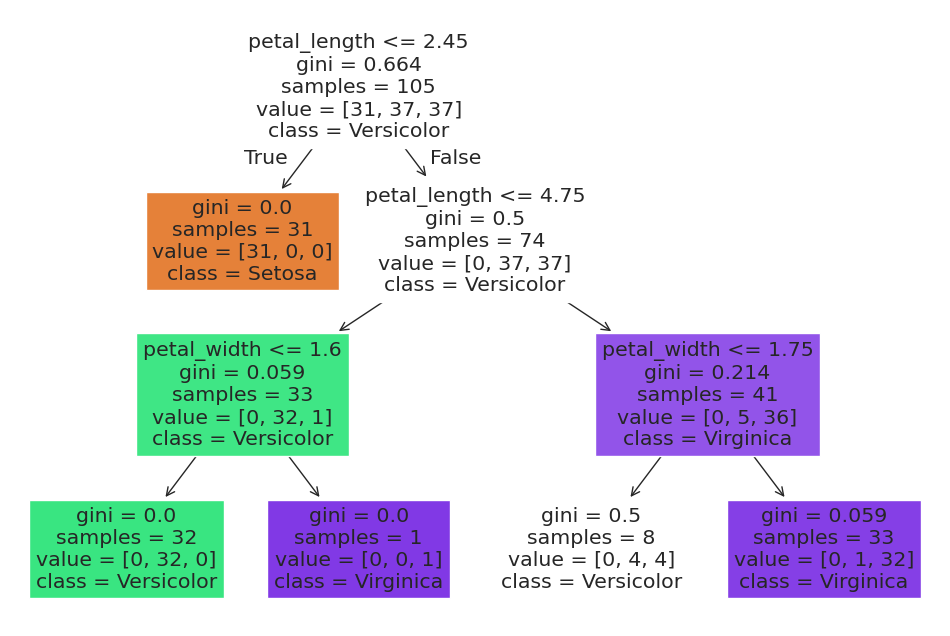

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf_dt, filled=True, feature_names=X.columns, class_names=["Setosa", "Versicolor", "Virginica"])
plt.show()


Penjelasan Hasil Output:
Gambar menunjukkan struktur Decision Tree yang digunakan untuk mengklasifikasikan spesies bunga iris berdasarkan fitur petal_length dan petal_width. Setosa terpisah sempurna dengan gini = 0 di awal percabangan. Versicolor dan Virginica dipisahkan berdasarkan petal_width, dengan sebagian kecil data masih bercampur (gini > 0). Tree ini cukup dalam, yang bisa meningkatkan risiko overfitting.

## 🏡 7. Training Model K-Nearest Neighbors (KNN)

In [ ]:
# Normalisasi data agar KNN bekerja lebih optimal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat model KNN dengan k=3
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_scaled, y_train)

# Prediksi data testing
y_pred_knn = clf_knn.predict(X_test_scaled)

# Evaluasi model
print("\nEvaluasi Model KNN:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))



Evaluasi Model KNN:
Akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Penjelasan Hasil Output:
Model K-Nearest Neighbors (KNN) juga mencapai akurasi sempurna (1.0) dengan precision, recall, dan f1-score 1.00 untuk semua kelas, menunjukkan bahwa model mengklasifikasikan semua sampel dengan benar.

Namun, akurasi 100% bisa mengindikasikan overfitting, terutama jika K terlalu kecil atau data uji terlalu mirip dengan data latih. Untuk mengatasi ini, bisa dicoba meningkatkan jumlah tetangga (K), menggunakan cross-validation, menormalisasi fitur agar jarak antar data lebih seimbang, mengurangi fitur yang kurang relevan, atau mencoba model lain seperti SVM atau Random Forest untuk perbandingan.

## 📌 8. Visualisasi Model KNN

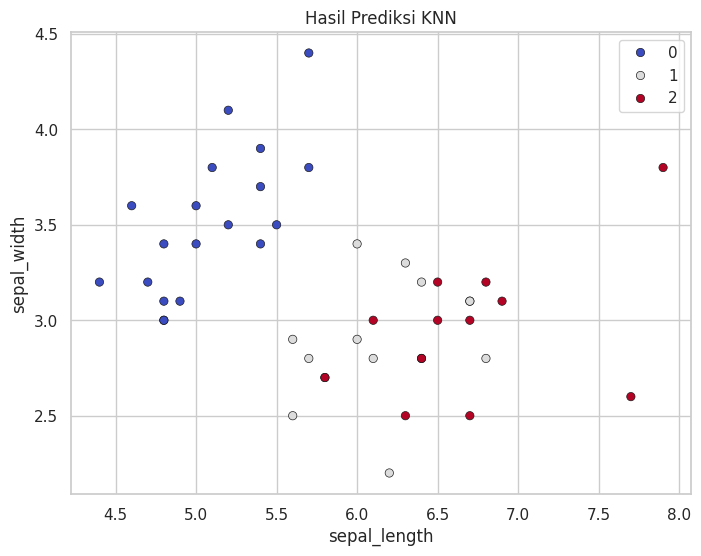

In [ ]:
# Visualisasi hasil prediksi KNN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred_knn, palette='coolwarm', edgecolor='k')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Hasil Prediksi KNN")
plt.show()


Penjelasan Hasil Output:
Plot menunjukkan hasil prediksi KNN berdasarkan fitur sepal_length dan sepal_width. Data terbagi menjadi tiga kelas yang ditandai dengan warna berbeda: biru (0), putih (1), dan merah (2). Setosa (biru) terpisah jelas, sementara versicolor (putih) dan virginica (merah) memiliki beberapa tumpang tindih, yang bisa menyebabkan potensi kesalahan prediksi. Hal ini menunjukkan bahwa dua fitur ini saja mungkin tidak cukup optimal untuk membedakan semua kelas dengan sempurna.

## 📌 9. Menguji Model dengan Data Baru

In [ ]:
# Definisi mapping angka ke nama bunga
label_mapping = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

# Contoh data baru (panjang dan lebar kelopak)
# new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
new_data = np.array([[6.1, 2.9, 4.7, 1.4]])  # Kemungkinan besar Versicolor

# Prediksi menggunakan model Decision Tree
prediction_dt = clf_dt.predict(new_data)
print("\nDecision Tree memprediksi bunga:", prediction_dt[0], "-", label_mapping[prediction_dt[0]])

# Prediksi menggunakan model KNN
prediction_knn = clf_knn.predict(scaler.transform(new_data))
print("KNN memprediksi bunga:", prediction_knn[0], "-", label_mapping[prediction_knn[0]])


Decision Tree memprediksi bunga: 1 - Versicolor
KNN memprediksi bunga: 1 - Versicolor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Penjelasan Hasil Output:
Baik Decision Tree maupun KNN memprediksi bunga sebagai Versicolor (kelas 1), menunjukkan hasil yang konsisten.

Peringatan yang muncul disebabkan oleh data input yang tidak memiliki nama fitur yang sesuai dengan data saat pelatihan model. Hal ini bisa terjadi jika data untuk prediksi tidak memiliki header atau urutan fitur berbeda.

Jika model tetap bekerja dengan baik, peringatan ini bisa diabaikan, tetapi untuk menghindari potensi error di masa depan, pastikan data input memiliki format, urutan, dan skala fitur yang sesuai dengan data latih sebelum melakukan prediksi.

## 📌 10. Evaluasi Model dengan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix - Decision Tree:\n", cm_dt)

# Confusion Matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix - KNN:\n", cm_knn)



Confusion Matrix - Decision Tree:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Confusion Matrix - KNN:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### 📊 Visualisasi Confusion Matrix

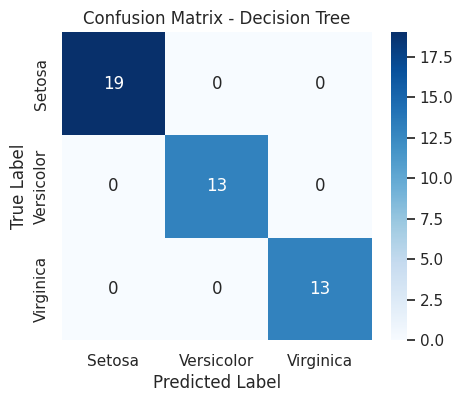

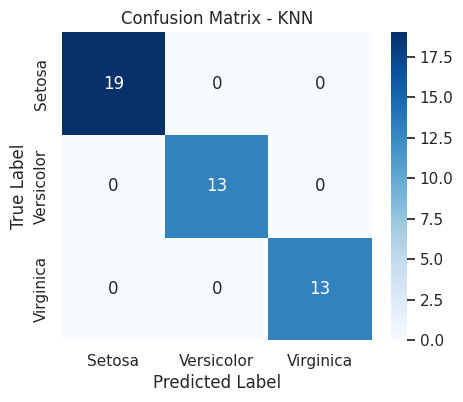

In [ ]:
import seaborn as sns

# Fungsi untuk menampilkan confusion matrix dengan warna
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Visualisasi Confusion Matrix untuk Decision Tree
plot_confusion_matrix(cm_dt, "Decision Tree")

# Visualisasi Confusion Matrix untuk KNN
plot_confusion_matrix(cm_knn, "KNN")


Confusion matrix menunjukkan bahwa Decision Tree mengklasifikasikan semua sampel dengan benar tanpa kesalahan. Semua Setosa (19), Versicolor (13), dan Virginica (13) diprediksi dengan tepat, yang menghasilkan akurasi 100%.

Hasil ini menunjukkan model bekerja sangat baik, tetapi juga bisa menjadi indikasi overfitting, terutama jika data latih dan uji terlalu mirip. Jika ingin memastikan generalisasi model, bisa dilakukan cross-validation atau mencoba model lain seperti Random Forest.

## 📌 11. Mencoba Model dengan Lebih Banyak Data Baru

In [ ]:
# Beberapa data baru untuk diuji
new_data_batch = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.5, 3.0, 5.2, 2.0],  # Virginica
    [5.9, 3.0, 4.2, 1.5]   # Versicolor
])

# Prediksi dengan Decision Tree
batch_prediction_dt = clf_dt.predict(new_data_batch)
# Prediksi dengan KNN
batch_prediction_knn = clf_knn.predict(scaler.transform(new_data_batch))

# Menampilkan hasil prediksi
print("\nHasil Prediksi Decision Tree:")
for i, pred in enumerate(batch_prediction_dt):
    print(f"Data ke-{i+1}: {pred} - {label_mapping[pred]}")

print("\nHasil Prediksi KNN:")
for i, pred in enumerate(batch_prediction_knn):
    print(f"Data ke-{i+1}: {pred} - {label_mapping[pred]}")



Hasil Prediksi Decision Tree:
Data ke-1: 0 - Setosa
Data ke-2: 2 - Virginica
Data ke-3: 1 - Versicolor

Hasil Prediksi KNN:
Data ke-1: 0 - Setosa
Data ke-2: 2 - Virginica
Data ke-3: 1 - Versicolor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Penjelasan Hasil Output:
Model diuji dengan lebih banyak data baru, dan Decision Tree serta KNN tetap memberikan hasil prediksi yang sama untuk semua sampel:

Data ke-1 → Setosa (0)
Data ke-2 → Virginica (2)
Data ke-3 → Versicolor (1)
Konsistensi ini menunjukkan bahwa kedua model stabil dalam mengklasifikasikan data baru. Jika ingin menguji lebih jauh, bisa dicoba dengan data yang lebih bervariasi atau menggunakan cross-validation untuk memastikan model tidak hanya bekerja baik pada dataset tertentu.

# 1️⃣ Tuning Hyperparameter (Mencari Setting Terbaik)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning untuk Decision Tree
param_grid_dt = {"max_depth": [2, 3, 5, 10, None]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_dt.best_params_)

# Hyperparameter tuning untuk KNN
param_grid_knn = {"n_neighbors": [1, 3, 5, 7, 10]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)


Best parameters for Decision Tree: {'max_depth': 3}
Best parameters for KNN: {'n_neighbors': 3}


Penjelasan Hasil Output:
Hasil tuning hyperparameter menunjukkan bahwa:

Decision Tree bekerja optimal dengan max_depth = 3, yang berarti pohon keputusan tidak terlalu dalam, sehingga mengurangi risiko overfitting dan tetap mampu menangkap pola yang baik dalam data.
KNN bekerja optimal dengan n_neighbors = 3, yang berarti setiap prediksi dibuat berdasarkan mayoritas dari tiga tetangga terdekat, menjaga keseimbangan antara bias dan varians agar model tidak terlalu sensitif terhadap noise.
Pemilihan parameter ini membantu meningkatkan generalizability model, sehingga tidak hanya bekerja baik pada data latih, tetapi juga mampu beradaptasi pada data baru dengan performa yang lebih stabil.

# 2️⃣ Perbandingan Model (Decision Tree vs KNN vs Random Forest)

Akurasi Random Forest: 1.0


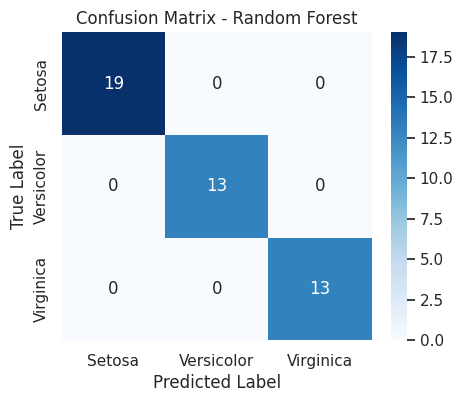

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Prediksi Random Forest
y_pred_rf = clf_rf.predict(X_test)

# Evaluasi
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))

# Visualisasi Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest")


Penjelasan Hasil Output:
Confusion matrix dari Random Forest menunjukkan bahwa model mengklasifikasikan semua sampel dengan benar tanpa kesalahan, dengan akurasi 100%.

Semua Setosa (19), Versicolor (13), dan Virginica (13) diklasifikasikan dengan benar, tanpa ada misclassification.
Hasil ini menunjukkan bahwa Random Forest sangat efektif dalam menangkap pola dari dataset ini, dengan reduksi varians dibandingkan Decision Tree tunggal, sehingga lebih stabil.